In [2]:
import camelot.io as camelot
import pandas as pd
import numpy as np

tables = camelot.read_pdf(
    r"C:/Users/kapil/Downloads/central_line_.pdf",
    flavor='stream',
    pages="all",
	#_______________________________
    row_tol=2,               # Tighten row detection
    edge_tol=750,
	#_______________________________
	table_areas=["50,800,800,0"]               #["50,700,550,100"] ## Left, Top, Right, Bottom
)
merged_df = pd.DataFrame()
count = 0
for i in tables:
    print(i)
    count += 1
    df = i.df
    num=df.index[df.iloc[:, 0] == "CSMT"][0] #Get the index of "CSMT"
    header_rows = df.loc[1:num-1]
    new_header = header_rows.apply(lambda x: '_'.join(x.astype(str)), axis=0)
    df.columns = new_header
    df = df.iloc[num:]
    df.rename(columns={df.columns[0]: 'Station_Name'}, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.to_csv(f"../data/raw/extracted_csv_file/Central_Line_{count}.csv")
    melted_df = pd.melt(df, id_vars=df.columns[0], var_name="Train_ID", value_name="Arrival_Time")
    melted_df.replace(['',"…","`"], np.nan, inplace=True)
    melted_df.dropna(inplace=True)
    melted_df["Arrival_Time"] =pd.to_datetime(melted_df["Arrival_Time"])
    melted_df["Arrival_Time"] = melted_df["Arrival_Time"].dt.strftime("%H:%M")
    melted_df["Station_Order"]=melted_df.groupby("Train_ID").cumcount() + 1  # creating station sequence
    melted_df.to_csv(f"../data/processed/cleaned_csv_file/Central_Line_{count}.csv")
    #--------------
    merged_df = pd.concat([merged_df,melted_df], ignore_index=True)
    
merged_df.to_csv(r"../data/processed/routewise_merge/Central_Line_DN.csv", index=False)

<Table shape=(56, 26)>
<Table shape=(56, 26)>
<Table shape=(56, 26)>
<Table shape=(56, 26)>
<Table shape=(55, 26)>


C:\Users\kapil\AppData\Local\Temp\ipykernel_8872\1595262002.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={df.columns[0]: 'Station_Name'}, inplace=True)
C:\Users\kapil\AppData\Local\Temp\ipykernel_8872\1595262002.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted_df["Arrival_Time"] =pd.to_datetime(melted_df["Arrival_Time"])
C:\Users\kapil\AppData\Local\Temp\ipykernel_8872\1595262002.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(col

<Table shape=(56, 26)>
<Table shape=(56, 26)>
<Table shape=(56, 26)>
<Table shape=(56, 26)>
<Table shape=(56, 27)>
<Table shape=(56, 27)>
<Table shape=(56, 26)>


C:\Users\kapil\AppData\Local\Temp\ipykernel_8872\1595262002.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={df.columns[0]: 'Station_Name'}, inplace=True)
C:\Users\kapil\AppData\Local\Temp\ipykernel_8872\1595262002.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted_df["Arrival_Time"] =pd.to_datetime(melted_df["Arrival_Time"])
C:\Users\kapil\AppData\Local\Temp\ipykernel_8872\1595262002.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(col

<Table shape=(56, 26)>
<Table shape=(56, 26)>
<Table shape=(56, 26)>
<Table shape=(56, 27)>
<Table shape=(56, 26)>
<Table shape=(56, 26)>


C:\Users\kapil\AppData\Local\Temp\ipykernel_8872\1595262002.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={df.columns[0]: 'Station_Name'}, inplace=True)
C:\Users\kapil\AppData\Local\Temp\ipykernel_8872\1595262002.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melted_df["Arrival_Time"] =pd.to_datetime(melted_df["Arrival_Time"])
C:\Users\kapil\AppData\Local\Temp\ipykernel_8872\1595262002.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(col

In [3]:
merged_df

,Station_Name,Train_ID,Arrival_Time,Station_Order
0,CSMT,96301_A 1__,00:02,1
1,Masjid,96301_A 1__,00:05,2
2,Sandhurst Road,96301_A 1__,00:07,3
3,Byculla,96301_A 1__,00:10,4
4,Chinchpokli,96301_A 1__,00:12,5
...,...,...,...,...
8510,Parel,97651_C 51__,00:13,7
8511,Dadar,97651_C 51__,00:16,8
8512,Matunga,97651_C 51__,00:19,9
8513,Sion,97651_C 51__,00:22,10


## Legends
	$ : 3 Cars For Ladies
	X and + : Will Not run on Sundays and Holidays
	"#" 	: Will run with 9 Car rake in lieu of 12 Car rake on Sundays
	L SPL 	: Ladies Special

In [ ]:
merged_df = pd.read_csv(r"E:\Project\optimised_route_to_travel_on_local\data\processed\routewise_merge\Central_Line_DN.csv", index_col= None)
merged_df.columns
merged_df = merged_df[['Station_Name', 'Train_ID', 'Arrival_Time',
       'Station_Order']]
merged_df.to_csv(r"../data/processed/routewise_merge/Central_Line_DN.csv", index=False)


In [5]:
import pandas as pd
merged_df = pd.read_csv(r"E:\Project\optimised_route_to_travel_on_local\data\processed\routewise_merge\Central_Line_DN.csv", index_col= None)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8515 entries, 0 to 8514
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Station_Name   8515 non-null   object
 1   Train_ID       8515 non-null   object
 2   Arrival_Time   8515 non-null   object
 3   Station_Order  8515 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 266.2+ KB


In [6]:
import numpy as np
merged_df.Train_ID.nunique()

453

# Creating the Graph

In [10]:
merged_df.head(2)

,Station_Name,Train_ID,Arrival_Time,Station_Order
0,CSMT,96301_A 1__,00:02:00,1
1,Masjid,96301_A 1__,00:05:00,2


In [9]:
merged_df.columns

Index(['Station_Name', 'Train_ID', 'Arrival_Time', 'Station_Order'], dtype='object')

 Index(['Station_Name', 'Train_ID', 'Arrival_Time', 'Station_Order'], dtype='object')

In [5]:
df=merged_df

In [12]:
merged_df.Train_ID.nunique()

453

# Total rows iterated should be in the for of 
## `N = A - r `
		N : The Total rows iterated
		A : The Total rows in Table
		r : Total no. of Groups

N = 8515 - 453 = 8062

In [13]:
for row in df.groupby(by="Train_ID"):
	print(row)

('95001_KP 1__',       Station_Name      Train_ID Arrival_Time  Station_Order
230           CSMT  95001_KP 1__     04:35:00              1
231        Byculla  95001_KP 1__     04:42:00              2
232          Dadar  95001_KP 1__     04:48:00              3
233          Kurla  95001_KP 1__     04:57:00              4
234      Ghatkopar  95001_KP 1__     05:02:00              5
235          Thane  95001_KP 1__     05:20:00              6
236       Dombivli  95001_KP 1__     05:36:00              7
237         Kalyan  95001_KP 1__     05:53:00              8
238     Vithalwadi  95001_KP 1__     05:57:00              9
239    Ulhas Nagar  95001_KP 1__     06:00:00             10
240      Ambernath  95001_KP 1__     06:04:00             11
241       Badlapur  95001_KP 1__     06:11:00             12
242        Vangani  95001_KP 1__     06:20:00             13
243          Shelu  95001_KP 1__     06:24:00             14
244          Neral  95001_KP 1__     06:28:00             15
245  Bh

In [6]:
import networkx as nx
from datetime import datetime, timedelta

# Function to convert HH:MM string to minutes
def time_to_minutes(t):
    try:
        dt = datetime.strptime(t, "%H:%M")
    except ValueError:
        dt = datetime.strptime(t, "%H:%M:%S")
    return dt.hour * 60 + dt.minute
    #return int(datetime.strptime(t, "%H:%M").hour) * 60 + int(datetime.strptime(t, "%H:%M").minute)

# Build graph
G = nx.DiGraph()

count = 0
# Group by train
for Train_ID, group in df.groupby(by="Train_ID"):
    group = group.sort_values("Station_Order").reset_index(drop=True)
    for i in range(len(group)-1):
        count += 1
        src = group.loc[i]
        dst = group.loc[i + 1]

        dep_time = time_to_minutes(str(src["Arrival_Time"]))
        arr_time = time_to_minutes(str(dst["Arrival_Time"]))
        duration = arr_time - dep_time

        if duration < 0:
            duration += 24 * 60  # handle midnight crossing

        G.add_edge(
            src["Station_Name"],
            dst["Station_Name"],
            Train_ID=Train_ID,
            dep_time=dep_time,
            arr_time=arr_time,
            duration=duration,
            weight = duration
        )
print(count)

8062


In [22]:
len(df)

8515

In [7]:
def find_best_route(graph, source, target, start_time_str):
    start_time = time_to_minutes(start_time_str)
    visited = set()
    paths = {source: ([], start_time)}  # station: (path_taken, current_time)

    import heapq
    queue = [(0, source, [], start_time)]  # (total_time, node, path, current_time)

    while queue:
        total_time, node, path, curr_time = heapq.heappop(queue)

        if node == target:
            return {
                "total_travel_time": total_time,
                "path": path + [node],
                "train": train
            }

        if (node, curr_time) in visited:
            continue
        visited.add((node, curr_time))

        for neighbor in graph.successors(node):
            edge_data = graph[node][neighbor]
            dep = edge_data["dep_time"]
            arr = edge_data["arr_time"]
            duration = edge_data["duration"]
            train = edge_data["Train_ID"]

            if dep >= curr_time:
                wait_time = dep - curr_time
                total_next = (total_time + wait_time + duration)
                heapq.heappush(queue, (total_next, neighbor, path + [node], arr))

    return None  # No path found

In [8]:
result = find_best_route(G, source="CSMT", target="Kalyan", start_time_str="13:27")
print(result)

{'total_travel_time': 2023, 'path': ['CSMT', 'Masjid', 'Sandhurst Road', 'Byculla', 'Chinchpokli', 'Currey Road', 'Parel', 'Dadar', 'Matunga', 'Sion', 'Kurla', 'Vidyavihar', 'Ghatkopar', 'Bhandup', 'Thane', 'Diva', 'Dombivli', 'Kalyan'], 'train': '97187_K 137__'}


In [45]:
df[(df['Arrival_Time'] == "12:30:00") & (df.Station_Name == "CSMT")]

,Station_Name,Train_ID,Arrival_Time,Station_Order


In [ ]:
df[df.Train_ID == "95411_N 17__"]

,Station_Name,Train_ID,Arrival_Time,Station_Order
3518,CSMT,95411_N 17__,12:30:00,1
3519,Byculla,95411_N 17__,12:37:00,2
3520,Dadar,95411_N 17__,12:43:00,3
3521,Kurla,95411_N 17__,12:50:00,4
3522,Ghatkopar,95411_N 17__,12:54:00,5
3523,Mulund,95411_N 17__,13:06:00,6
3524,Thane,95411_N 17__,13:12:00,7
3525,Diva,95411_N 17__,13:23:00,8
3526,Dombivli,95411_N 17__,13:29:00,9
3527,Kalyan,95411_N 17__,13:37:00,10


In [18]:
nx.shortest_path(G,
    source="CSMT", target="Kalyan",
    weight= 'weight')

['CSMT', 'Byculla', 'Dadar', 'Thane', 'Dombivli', 'Kalyan']

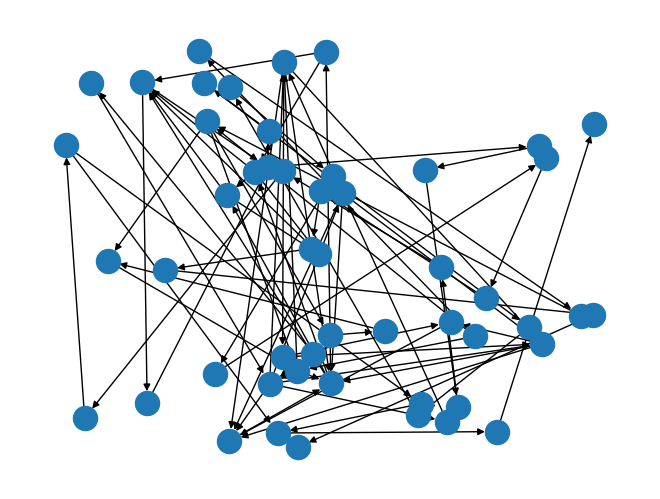

In [ ]:
nx.draw_random(G,)

In [ ]:
import matplotlib.pyplot as pt
pt.show()

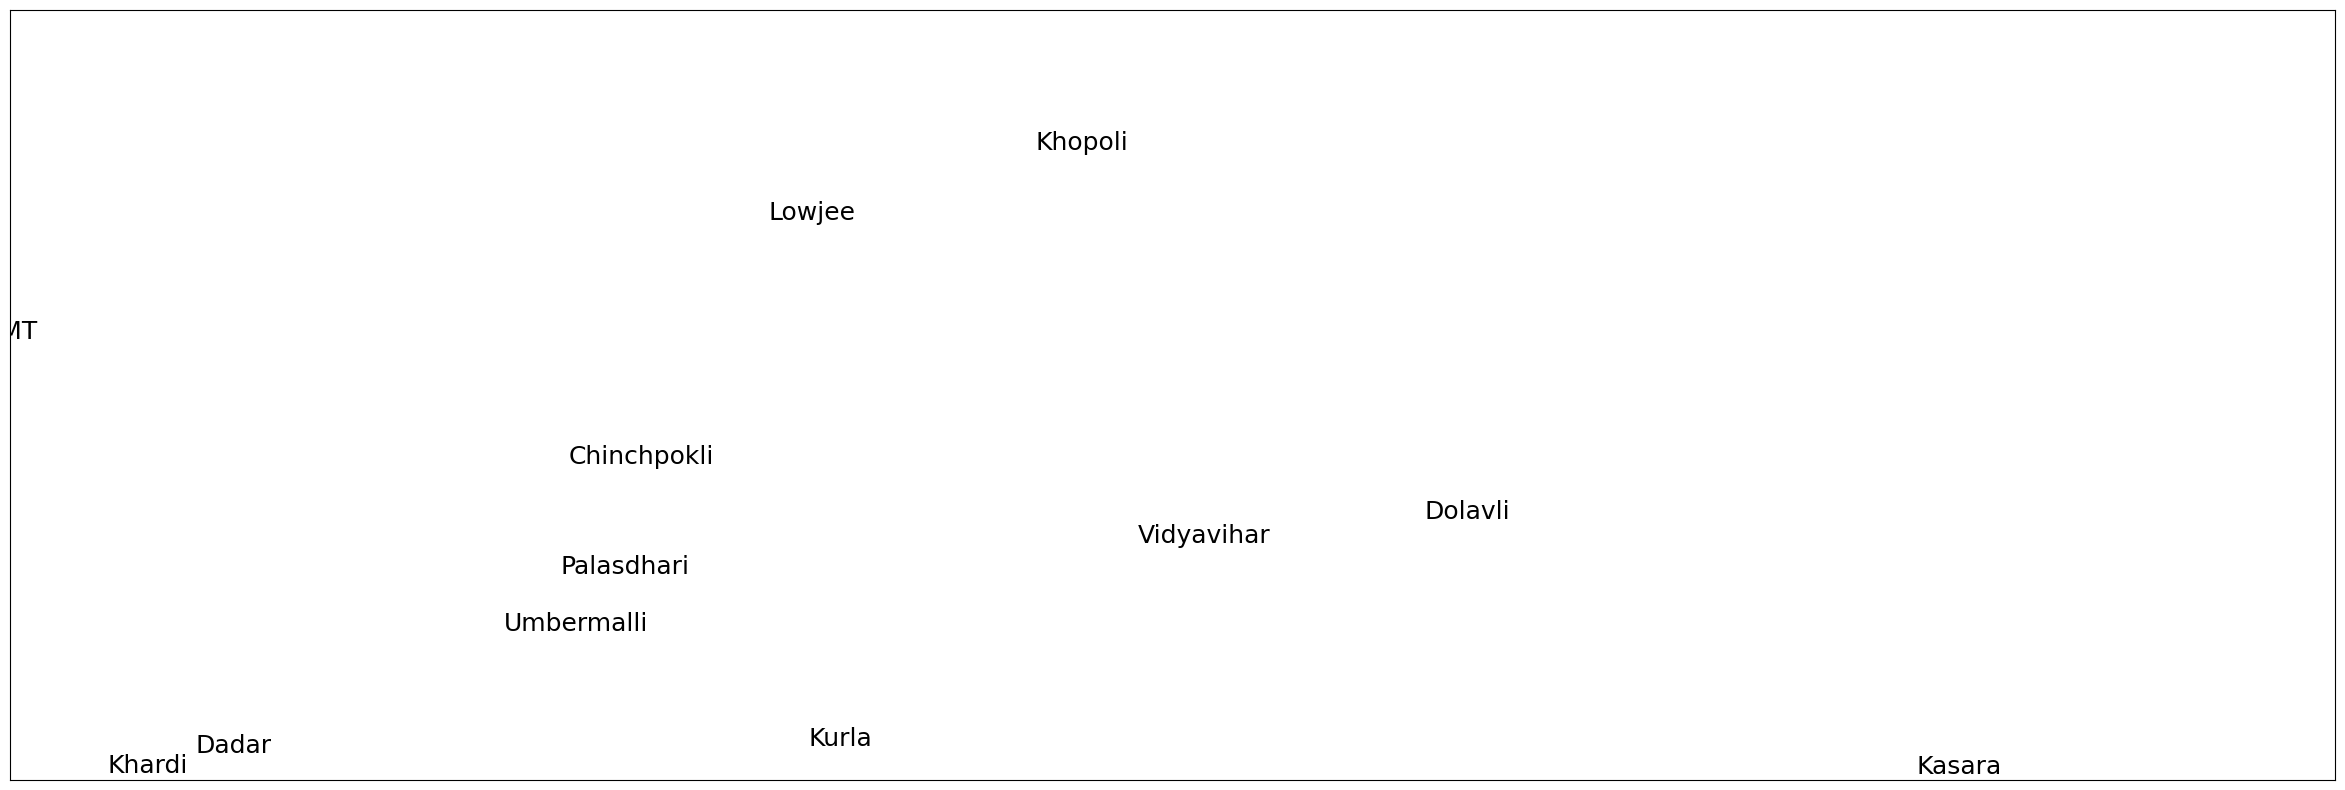

In [ ]:
pt.figure(figsize=(30,10))
nx.draw_networkx_labels(G, pos=nx.spring_layout(G, k=0.5) ,
						labels=None, font_size=18, 
						font_color='k' , 
						font_family='sans-serif', #font_weight='normal', 
						alpha=None, bbox=None, horizontalalignment='center', 
						verticalalignment='center', ax=None, clip_on=True, hide_ticks=True)
pt.show()

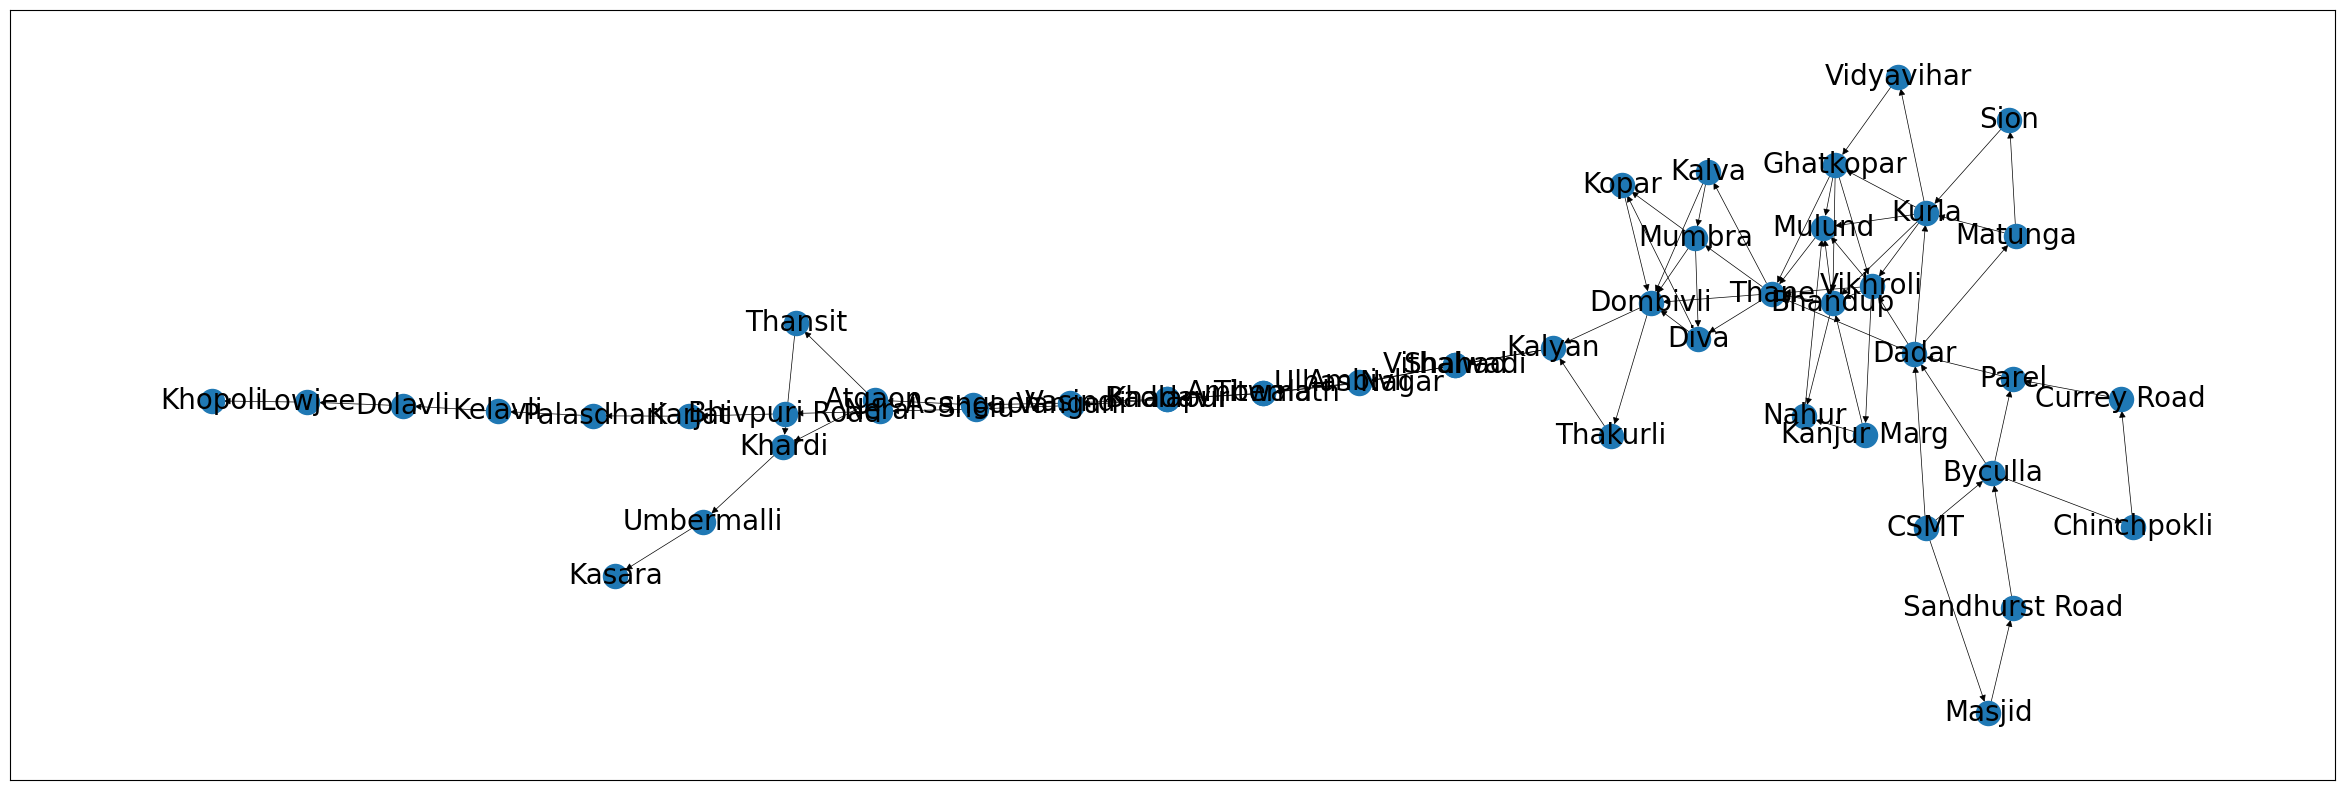

In [ ]:
pt.figure(figsize=(30,10))
nx.draw_networkx(G, pos=nx.kamada_kawai_layout(G), arrows=None, with_labels=True,
				 font_size=20, width=0.5)
pt.show()

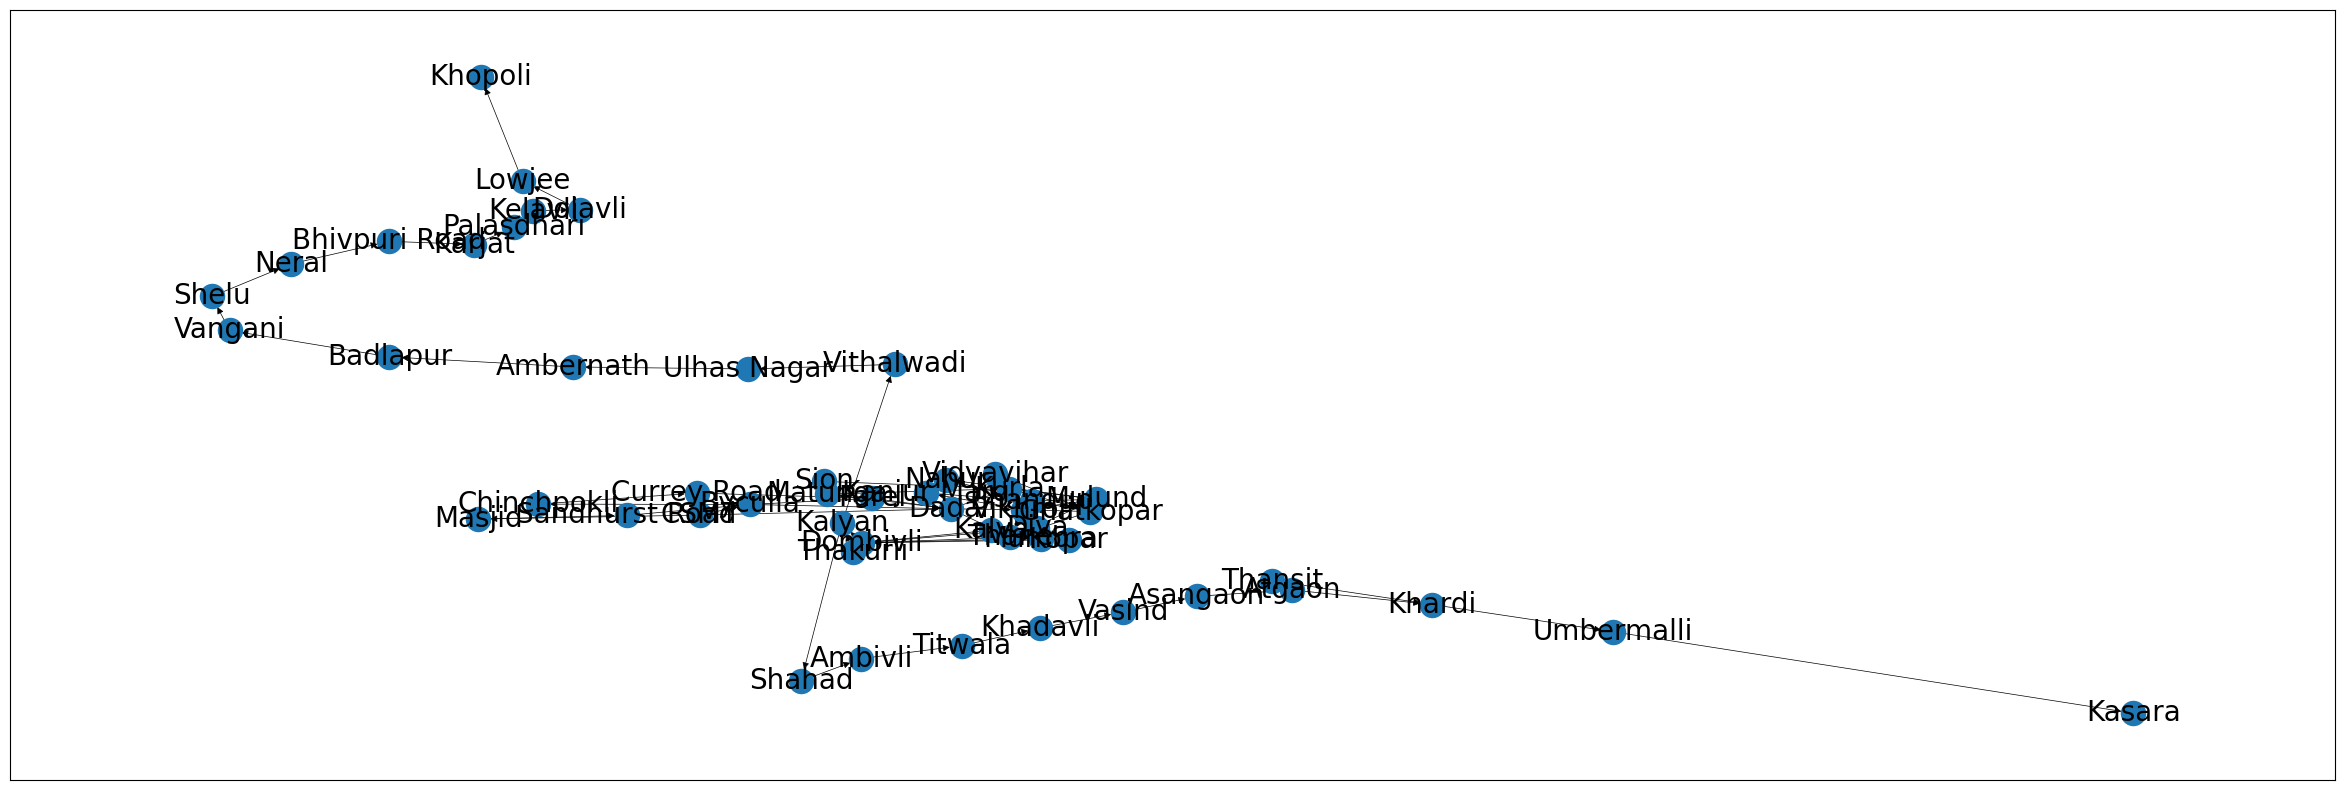

In [ ]:
pt.figure(figsize=(30,10))
nx.draw_networkx(G, pos=nx.spring_layout(G, k=0.1), arrows=None, with_labels=True,
				 font_size=20, width=0.5)
pt.show()

In [1]:
pt.figure(figsize=(30,10))
nx.draw_networkx(G, pos=nx.multipartite_layout(G), arrows=None, with_labels=True,
				 font_size=20, width=0.5)
pt.show()

NameError: name 'pt' is not defined

In [37]:
for u, v, data in G.edges(data=True):

	print(data['weight'])

8
16
3
7
6
2
8
3
23
14
4
8
16
10
3
14
13
8
5
15
11
5
8
9
4
5
4
3
6
9
8
4
4
7
9
5
7
3
4
6
5
6
5
9
3
5
9
14
3
5
12
6
3
4
3
4
9
9
4
5
3
8
7
7
8
9
5
10
5
6
11
2
6
3
2
3
2
3
5
3


In [40]:
from pyvis.network import Network

# Convert to interactive pyvis network
net = Network(notebook=True, directed=True)

stations = set(df["Station_Name"])
for station in stations:
    net.add_node(station, label=station)

    
for u, v, data in G.edges(data=True):
    label = data['weight'] #f"Train {data['Train_ID']}<br>{data['dep_time']} → {data['arr_time']}"
    print(data['weight'])
    net.add_edge(u, v, 
                 label=label, title=label, 
                 weight = data['weight'])

# Save and open in browser
net.show("interactive_train_graph.html")

8
16
3
7
6
2
8
3
23
14
4
8
16
10
3
14
13
8
5
15
11
5
8
9
4
5
4
3
6
9
8
4
4
7
9
5
7
3
4
6
5
6
5
9
3
5
9
14
3
5
12
6
3
4
3
4
9
9
4
5
3
8
7
7
8
9
5
10
5
6
11
2
6
3
2
3
2
3
5
3
interactive_train_graph.html


In [29]:
# df[df.Train_ID == "97187_K 137__"]
df[(df.Station_Name == "CSMT") & (df.Station_Order == 1) & (df.Station_Order == 1)]

,Station_Name,Train_ID,Arrival_Time,Station_Order
0,CSMT,96301_A 1__,00:02:00,1
29,CSMT,97601_C 1__,00:05:00,1
40,CSMT,96401_N 1__,00:08:00,1
77,CSMT,96101_S 1__,00:12:00,1
112,CSMT,97301_T 1__,00:24:00,1
...,...,...,...,...
8407,CSMT,96653_TL 65__,23:42:00,1
8436,CSMT,97439_T 139__,23:46:00,1
8455,CSMT,96229_BL 61__,23:51:00,1
8485,CSMT,97441_T 141__,23:55:00,1


# Graphs with duration as the weight

In [63]:
import pandas as pd
import networkx as nx
from datetime import datetime, timedelta

# Load your table data
df = pd.read_csv(r"E:\Project\optimised_route_to_travel_on_local\data\processed\routewise_merge\Central_Line_DN.csv", index_col= None)

df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'], format='%H:%M:%S').dt.time
# Build a graph
G = nx.DiGraph()

# Add edges based on Train_ID and Station_Order
for train_id, group in df.groupby('Train_ID'):
    group = group.sort_values('Station_Order')
    for i in range(len(group) - 1):
        curr = group.iloc[i]
        nxt = group.iloc[i+1]

        src = f"{curr['Station_Name']}@{train_id}"
        dst = f"{nxt['Station_Name']}@{train_id}"

        travel_time = (nxt['Arrival_Time'] - curr['Arrival_Time']).total_seconds() / 60
        G.add_edge(src, dst, weight=travel_time)

# Function to find best route
def find_best_route(current_time, source, destination):
    # Filter nodes starting from source station after current_time
    candidates = [node for node in G.nodes if node.startswith(source + "@") and
                  df[df['Station_Name'] == source & (df['Arrival_Time'] >= current_time)].shape[0] > 0]

    # Run shortest path search from each candidate
    shortest_route = None
    shortest_time = float('inf')

    for start_node in candidates:
        try:
            for end_node in G.nodes:
                if end_node.startswith(destination + "@"):
                    route = nx.dijkstra_path(G, start_node, end_node, weight="weight")
                    total_time = sum(G[u][v]['weight'] for u, v in zip(route[:-1], route[1:]))
                    if total_time < shortest_time:
                        shortest_time = total_time
                        shortest_route = route
        except:
            continue

    return shortest_route, shortest_time

TypeError: unsupported operand type(s) for -: 'datetime.time' and 'datetime.time'

In [62]:
df.head(1)

,Station_Name,Train_ID,Arrival_Time,Station_Order
0,CSMT,96301_A 1__,NaT,1


In [60]:
G.nodes

NodeView(('CSMT@95001_KP 1__', 'Byculla@95001_KP 1__', 'Dadar@95001_KP 1__', 'Kurla@95001_KP 1__', 'Ghatkopar@95001_KP 1__', 'Thane@95001_KP 1__', 'Dombivli@95001_KP 1__', 'Kalyan@95001_KP 1__', 'Vithalwadi@95001_KP 1__', 'Ulhas Nagar@95001_KP 1__', 'Ambernath@95001_KP 1__', 'Badlapur@95001_KP 1__', 'Vangani@95001_KP 1__', 'Shelu@95001_KP 1__', 'Neral@95001_KP 1__', 'Bhivpuri Road@95001_KP 1__', 'Karjat@95001_KP 1__', 'Palasdhari@95001_KP 1__', 'Kelavli@95001_KP 1__', 'Dolavli@95001_KP 1__', 'Lowjee@95001_KP 1__', 'Khopoli@95001_KP 1__', 'CSMT@95003_KP 3__', 'Byculla@95003_KP 3__', 'Dadar@95003_KP 3__', 'Kurla@95003_KP 3__', 'Ghatkopar@95003_KP 3__', 'Mulund@95003_KP 3__', 'Thane@95003_KP 3__', 'Dombivli@95003_KP 3__', 'Kalyan@95003_KP 3__', 'Vithalwadi@95003_KP 3__', 'Ulhas Nagar@95003_KP 3__', 'Ambernath@95003_KP 3__', 'Badlapur@95003_KP 3__', 'Vangani@95003_KP 3__', 'Shelu@95003_KP 3__', 'Neral@95003_KP 3__', 'Bhivpuri Road@95003_KP 3__', 'Karjat@95003_KP 3__', 'Palasdhari@95003_KP 

In [57]:
find_best_route("00:02:00", "CSTM", "Kurla")

(None, inf)